<a href="https://colab.research.google.com/github/DmitrijLeontev/Dmitrij_Leontev/blob/main/DzDatascience/%D0%94%D0%9714_UltraPro_%D0%98%D0%BD%D1%82%D0%B5%D0%B3%D1%80%D0%B0%D1%86%D0%B8%D1%8F_%D0%BD%D0%B5%D0%B9%D1%80%D0%BE%D0%BD%D0%BD%D0%BE%D0%B9_%D1%81%D0%B5%D1%82%D0%B8_%D0%BD%D0%B0_%D0%94%D0%95%D0%9C%D0%9E_%D0%9F%D0%90%D0%9D%D0%95%D0%9B%D0%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Необходимо создать, обучить нейронную сеть с точностью не менее 50% и упаковать её в архив для загрузки на демо-панель:
* создать нейронную сеть для распознавания классов в cifar100
* сохраните веса
* подготовить запуск модели "из коробки"
* подготовить архив с готовой нейронной сетью для загрузки в демо-панель


Начнем с загрузки базы изображений и ее конвертации в нужный формат:

In [ ]:
from tensorflow.keras.datasets import cifar100

# Загрузка cifar100
(x_train100, y_train100), (x_test100, y_test100) = cifar100.load_data()

169001437/169001437 [==============================] - 2s 0us/step


In [ ]:
# Размер изображения 32 x 32, 3 канала (цветное)

x_train100.shape

(50000, 32, 32, 3)

Названия классов cifar100:

In [ ]:
# определяем названия классов по порядку, установленному в описании набора данных
classes = ['apple', 'aquarium_fish', 'baby', 'bear', 'beaver',
           'bed', 'bee', 'beetle', 'bicycle', 'bottle',
           'bowl', 'boy', 'bridge', 'bus', 'butterfly',
           'camel', 'can', 'castle', 'caterpillar', 'cattle',
           'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach',
           'couch', 'crab', 'crocodile', 'cup', 'dinosaur',
           'dolphin', 'elephant', 'flatfish', 'forest', 'fox',
           'girl', 'hamster', 'house', 'kangaroo', 'computer_keyboard',
           'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard',
           'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain',
           'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid',
           'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree',
           'plain', 'plate', 'poppy', 'porcupine', 'possum',
           'rabbit', 'raccoon', 'ray', 'road', 'rocket',
           'rose', 'sea', 'seal', 'shark', 'shrew',
           'skunk', 'skyscraper', 'snail', 'snake', 'spider',
           'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table',
           'tank', 'telephone', 'television', 'tiger', 'tractor',
           'train', 'trout', 'tulip', 'turtle', 'wardrobe',
           'whale', 'willow_tree', 'wolf', 'tawomannk', 'worm']

In [ ]:
# Нормирование изображений

x_train100 = x_train100 / 255.
x_test100 = x_test100 / 255.

In [ ]:
# Перевод меток класса y_train и y_test в формат one hot encoding

from tensorflow.keras import utils

# Число категорий в to_categorical() можно не указывать - инструмент определит его по данным
y_train100 = utils.to_categorical(y_train100)
y_test100 = utils.to_categorical(y_test100)

In [ ]:
# Проверка формы получившихся выборок

print(x_train100.shape)
print(x_test100.shape)
print(y_train100.shape)
print(y_test100.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 100)
(10000, 100)


Задайте размер пакета:

In [ ]:
batch_size = 128

Создайте архитектуру модели:

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization

In [ ]:
model = Sequential()

model.add(BatchNormalization(input_shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(100, activation='softmax'))

Проверьте созданную архитектуру модели:

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (Batch  (None, 32, 32, 3)         12        
 Normalization)                                                  
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 batch_normalization_1 (Bat  (None, 16, 16, 32)        1

Скомпилируйте модель, задав оптимизатор, функцию ошибки и метрики для проверки. Затем обучите модель на подготовленных выборках и выведите график точности обучения:

Epoch 1/10
391/391 [==============================] - 10s 19ms/step - loss: 1.4322 - accuracy: 0.5938 - val_loss: 1.8207 - val_accuracy: 0.5139
Epoch 2/10
391/391 [==============================] - 7s 19ms/step - loss: 1.4018 - accuracy: 0.6008 - val_loss: 1.8580 - val_accuracy: 0.5113
Epoch 3/10
391/391 [==============================] - 7s 18ms/step - loss: 1.3649 - accuracy: 0.6109 - val_loss: 1.8178 - val_accuracy: 0.5188
Epoch 4/10
391/391 [==============================] - 7s 18ms/step - loss: 1.3315 - accuracy: 0.6157 - val_loss: 1.8289 - val_accuracy: 0.5209
Epoch 5/10
391/391 [==============================] - 7s 18ms/step - loss: 1.3098 - accuracy: 0.6266 - val_loss: 1.8429 - val_accuracy: 0.5203
Epoch 6/10
391/391 [==============================] - 7s 19ms/step - loss: 1.2791 - accuracy: 0.6328 - val_loss: 1.8117 - val_accuracy: 0.5255
Epoch 7/10
391/391 [==============================] - 7s 18ms/step - loss: 1.2540 - accuracy: 0.6366 - val_loss: 1.8103 - val_accuracy: 0.527

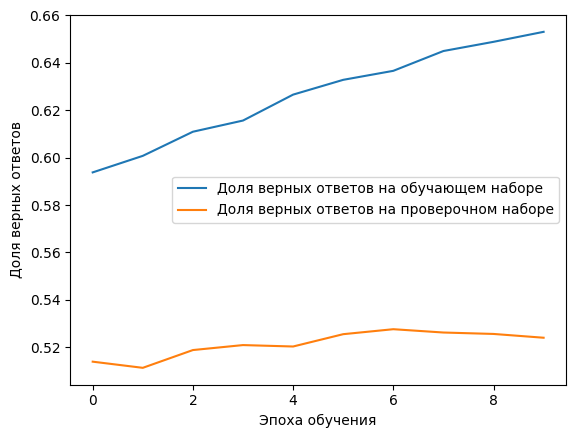

In [ ]:
from tensorflow.keras.optimizers import Adam

model.compile(loss="categorical_crossentropy", optimizer=Adam(learning_rate=0.0001), metrics=["accuracy"])

history = model.fit(x_train100,
                    y_train100,
                    batch_size=batch_size,
                    epochs=10,
                    validation_data=(x_test100, y_test100),
                    verbose=1)

# Вывод графика точности обучения

import matplotlib.pyplot as plt # -------- отрисовка графиков

plt.plot(history.history['accuracy'], label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

Сохраните всю модель (архитектуру и веса) после обучения:

In [ ]:
# Сохранение обученной модели полностью (веса и архитектура) после всех эпох

model.save('model_fmr_all.h5_2')

Загрузите сохраненную модель в переменную model:

In [ ]:
from tensorflow.keras.models import load_model

model = load_model('model_fmr_all.h5_2')

Подготовьте тестовую картинку для подачи в модель:

In [ ]:
# Загрузка тестовых изображений 10 классов

import gdown
gdown.download('https://storage.yandexcloud.net/aiueducation/Content/knowledge/test_images.zip', None, quiet=True)

'test_images.zip'

In [ ]:
# Распаковка архива

!unzip -qo test_images.zip

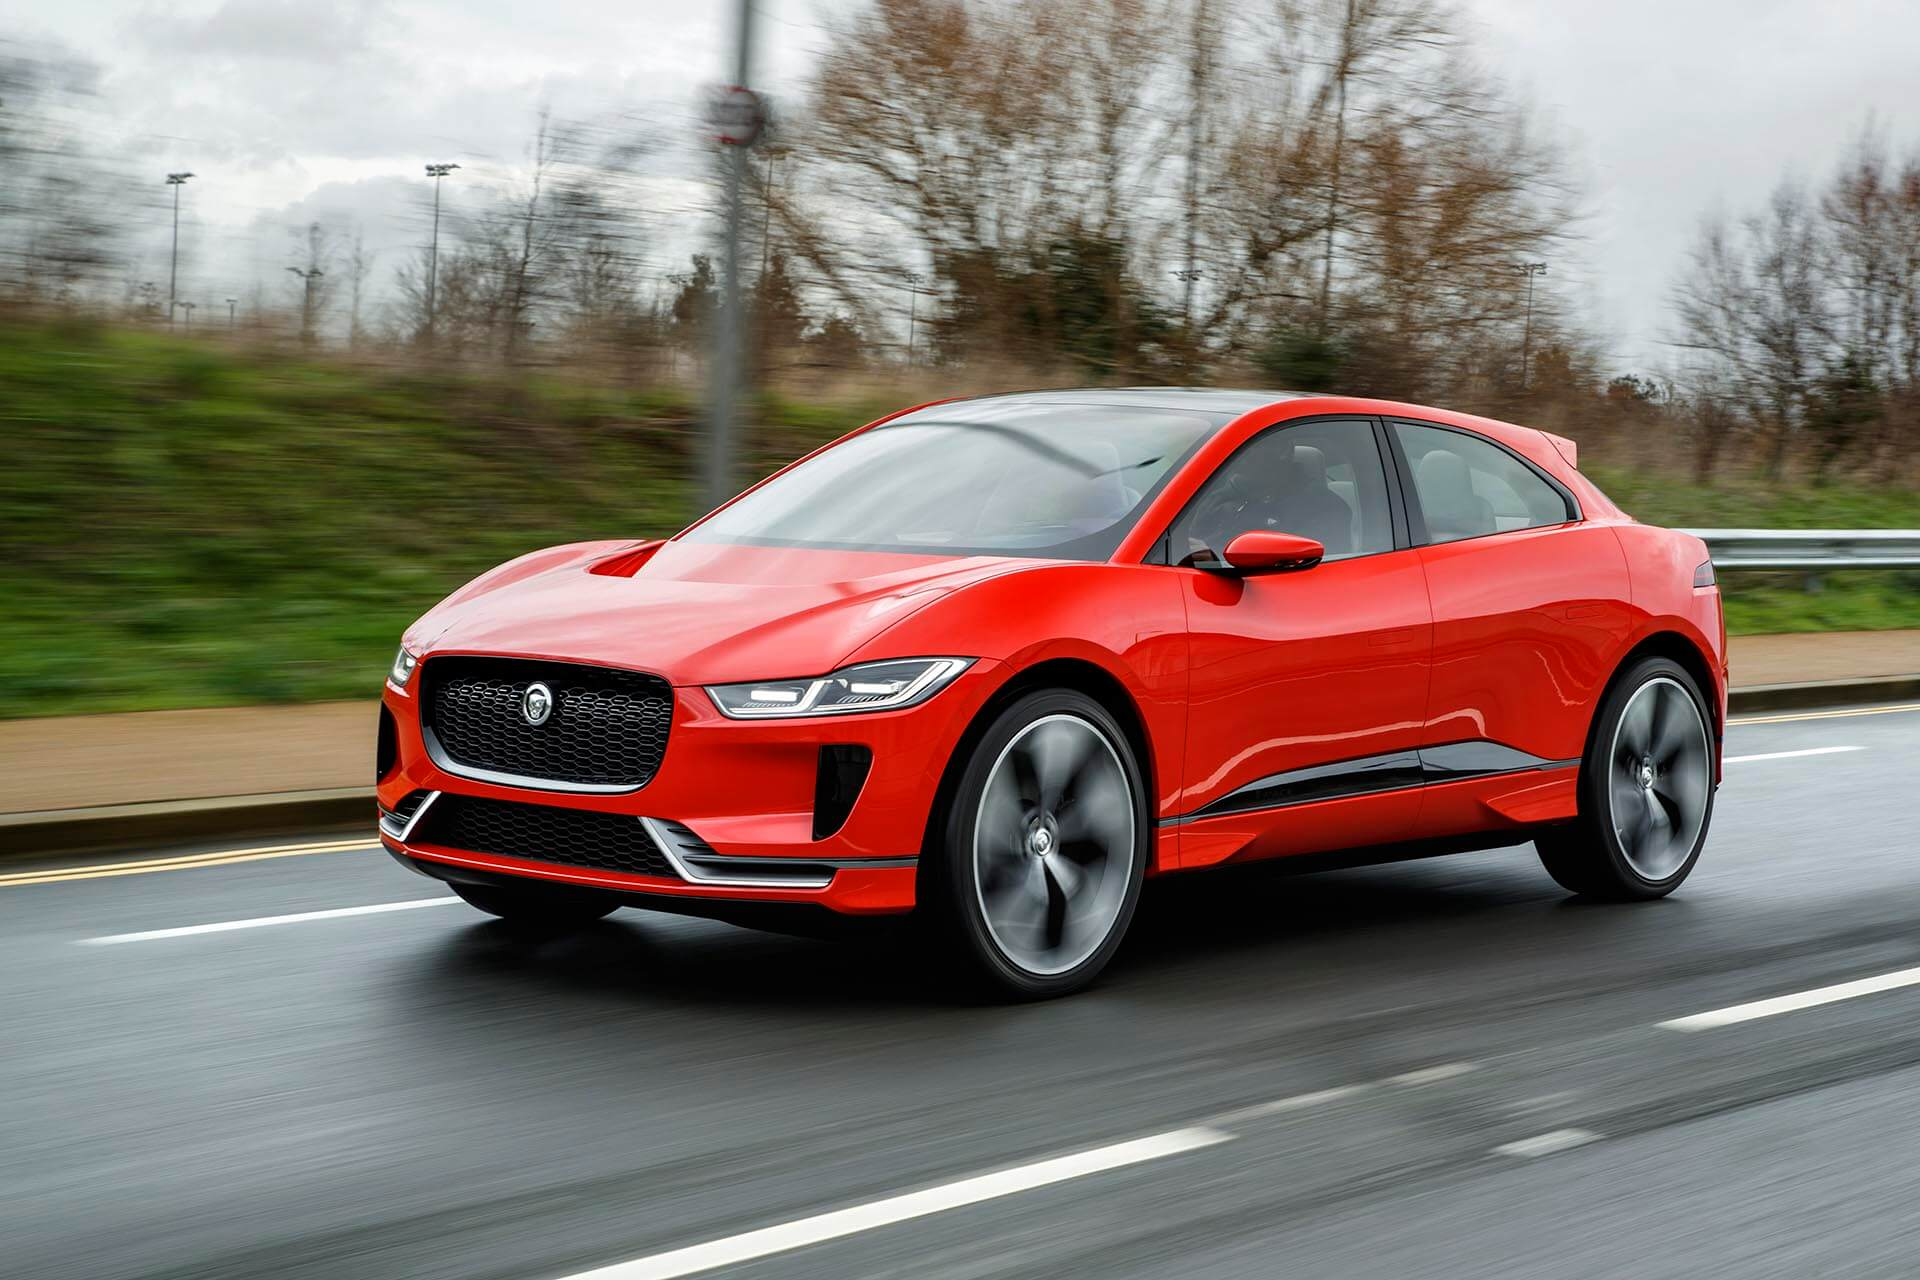

In [ ]:
# Просмотр тестового изображения

from PIL import Image

# Путь к файлу изображения
test_path = '/content/test_images/2.jpg'
img = Image.open(test_path)

# Вывод изображения на экран
display(img)

Задайте требуемый для модели размер изображения:

In [ ]:
# Требуемый для модели размер изображения
img_width, img_height = 32, 32

Подготовьте тестовое изображение для подачи в модель.

Для наглядного расположения выводимой информации воспользуемся строковым методом .format(), задав выравнивание влево для имени класса и процентное представление вероятности принадлежности картинки к классу.

Для извлечения индексов класса применим встроенную функцию enumerate(), которая вернет не только элементы списка (имена классов), но и их индексы. Для всех классов это удобно сделать в цикле:

for i, cl in enumerate(classes):

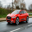

1/1 [==============================] - 1s 719ms/step
Результат распознавания:
apple          0.00%
aquarium_fish  0.00%
baby           0.00%
bear           0.00%
beaver         0.00%
bed            0.00%
bee            0.00%
beetle         0.00%
bicycle        0.00%
bottle         0.00%
bowl           0.00%
boy            0.00%
bridge         0.00%
bus            0.15%
butterfly      0.00%
camel          0.00%
can            0.00%
castle         0.00%
caterpillar    0.00%
cattle         0.00%
chair          0.00%
chimpanzee     0.00%
clock          0.00%
cloud          0.00%
cockroach      0.00%
couch          0.00%
crab           0.00%
crocodile      0.00%
cup            0.00%
dinosaur       0.00%
dolphin        0.00%
elephant       0.00%
flatfish       0.00%
forest         0.00%
fox            0.00%
girl           0.00%
hamster        0.00%
house          0.00%
kangaroo       0.00%
computer_keyboard 0.00%
lamp           0.00%
lawn_mower     0.33%
leopard        0.00%
lion           0

In [ ]:
# Подготовка изображения для подачи в модель НС

import numpy as np

# Открытие картинки и изменение ее размера для соответсвия входу модели
img = Image.open(test_path).resize((img_width, img_height))

# Проверка результата
display(img)

# Преобразование картинки в numpy-массив чисел с плавающей запятой и нормализация значений пикселей
image = np.array(img, dtype='float64') / 255.

# добавление оси для совпадения формы входа модели; получается батч из одного примера
image = np.expand_dims(image, axis=0)

# Распознавание изображения нейросетью

pred = model.predict(image)
print('Результат распознавания:')

for i, cl in enumerate(classes):
    # Вывод предсказания сети для каждого класса
    print('{:<14s}{:6.2%}'.format(cl, pred[0, i]))
print()

# Вычисление индекса класса с максимальным значением вероятности и вывод имени класса
cls_image = np.argmax(model.predict(image))
print('Изображен(а): ', classes[cls_image])

Запуск модели на демо-панели
Итак, у вас есть почти все необходимое для размещения модели нейронной сети на демо-панели. Осталась лишь пара штрихов.

Вначале создадим скрипт, который реализует распознавание изображения.

ВАЖНЫЕ МОМЕНТЫ в задании главной функции скрипта:

она должна иметь имя predict, так как сервер демо-панели будет вызывать функцию именно с таким именем;
она должна иметь первый обязательный аргумент img_path - путь к тестовому изображению на сервере демо-панели;
она должна иметь второй обязательный аргумент model_path - путь к модели на сервере демо-панели;
в скрипте должны быть импортированы все необходимые библиотеки для запуска модели, открытия и подготовки изображения.
В итоге скрипт может иметь примерно следующий вид:

In [ ]:
from PIL import Image
import numpy as np
from tensorflow.keras.models import load_model

def predict(img_path='./test_image_1.jpg', model_path='./model_fmr_all.h5_2'):
    classes = {0: 'самолет',
               1: 'автомобиль',
               2: 'птица',
               3: 'кот',
               4: 'олень',
               5: 'собака',
               6: 'лягушка',
               7: 'лошадь',
               8: 'корабль',
               9: 'грузовик'}

    model = load_model(model_path)

    img_width, img_height = 32, 32

    img = Image.open(img_path).resize((img_height, img_width))
    image = np.array(img, dtype='float64') / 255

    image = np.expand_dims(image, axis=0)
    cls_image = np.argmax(model.predict(image))

    print(classes[cls_image])

Попробуйте вызвать функцию predict() в ячейке Colab:

In [ ]:
predict(img_path='/content/test_images/10.jpg', model_path='model_fmr_all.h5_2')

1/1 [==============================] - 0s 123ms/step
корабль


Теперь создадим текстовый файл с расширением .py и запишем в него созданный выше код (это и будет скрипт для демо-панели):

In [ ]:
# Сохранение кода скрипта в переменной text_code

text_code = '''
from tensorflow.keras.models import load_model
from PIL import Image
import numpy as np

def predict(img_path='./test_image_1.jpg', model_path='./model_fmr_all.h5_2'):
    classes = {0: 'самолет',
               1: 'автомобиль',
               2: 'птица',
               3: 'кот',
               4: 'олень',
               5: 'собака',
               6: 'лягушка',
               7: 'лошадь',
               8: 'корабль',
               9: 'грузовик'}

    model = load_model(model_path)

    img_width, img_height = 32, 32

    img = Image.open(img_path).resize((img_height, img_width))
    image = np.array(img, dtype='float64') / 255

    image = np.expand_dims(image, axis=0)
    cls_image = np.argmax(model.predict(image))

    print(classes[cls_image])

'''

# Запись содержимого переменной в файл скрипта

with open('script.py', 'w') as f:  # Создание / открытие файла
    f.write(text_code)             # Запись в файл значения переменной text_code

Следующим шагом подберем десять различных изображений, соответствующих классам датасета. Эти десять изображений будут отображаться на странице демо-панели в качестве пресетов. Загрузим их в директорию Colab под порядковыми номерами классов.

Вы можете взять абсолютно любые 10 изображений.

Здесь возьмем для этих целей файлы из тестовой папки:

In [ ]:
# Библиотека для работы с файлами
from shutil import copyfile

for i in range(1, 11):
    copyfile(f'/content/test_images/{i}.jpg', f'/content/{i}.jpg')

Далее создадим текстовый файл label.txt с именами классов, распознаваемых моделью. Алгоритм аналогичный: сначала создаем текстовую переменную с именами классов, затем записываем текст в файл:

In [ ]:
label_txt = '''

самолет
автомобиль
птица
кот
олень
собака
лягушка
лошадь
корабль
грузовик

'''

with open('label.txt', 'w') as f:  # Создание / открытие файла
    f.write(label_txt.strip())     # Запись в файл значения переменной

Осталось упаковать все файлы в один архив для отправки на сервер.

In [ ]:
import os
from zipfile import ZipFile as Zip             # Модуль для работы с zip-архивами

# Список всех файлов
integrate_files = ['model_fmr_all.h5_2', 'script.py', 'label.txt', *[f'{i}.jpg' for i in range(1, 11)]]

zipArchive = Zip('/content/archive.zip', 'w')  # Открытие файла, если такого не существует - будет создан новый

for file in integrate_files:                   # Для всех всем нужных файлов:
    if os.path.exists(file):                   # Если файл существует,
        zipArchive.write(file)                 # то добавление его в архив
    else:
        print(f'Файл {file} отсутствует!')     # иначе вывод на экран названия отсутствующего файла

zipArchive.close()                             # В финале архив следует закрыть, как и обычный файл

Скачайте готовый Zip-архив себе на компьютер, чтобы далее отправить его на сервер:

In [ ]:
from google.colab import files               # Функция для скачивания данных на локальный компьютер

files.download(filename='archive.zip')       # Скачивание готового архива

print('Архив загружен')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Архив загружен
